In [ ]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Preprocessing**

In [ ]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Define file paths
train = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/train'
test = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/test'
validation = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/val'

In [ ]:
# Define size and batch size
size = 224
batch_size = 32

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45, 
    zoom_range = 0.2,
    shear_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
# Data Generator
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

Found 264 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


**Trained Model**

In [ ]:
# Input transfer learning model using Mobile Net
mobile = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

# Freeze the layer on model
for layer in mobile.layers:
  layer.trainable = False

#Add more layers on top of the base model
x = mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(8, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(3, activation = 'softmax')(x)

model = Model(inputs = mobile.input, outputs = x)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
# Training Process
model.compile(
    optimizer = 'Adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 15,
    verbose = 2
)

Epoch 1/15
9/9 - 54s - loss: 0.9727 - accuracy: 0.5530 - val_loss: 0.8782 - val_accuracy: 0.5455 - 54s/epoch - 6s/step
Epoch 2/15
9/9 - 7s - loss: 0.7839 - accuracy: 0.7008 - val_loss: 0.6315 - val_accuracy: 0.7576 - 7s/epoch - 783ms/step
Epoch 3/15
9/9 - 6s - loss: 0.5909 - accuracy: 0.8220 - val_loss: 0.4579 - val_accuracy: 0.9091 - 6s/epoch - 671ms/step
Epoch 4/15
9/9 - 7s - loss: 0.4362 - accuracy: 0.8864 - val_loss: 0.3222 - val_accuracy: 0.9394 - 7s/epoch - 779ms/step
Epoch 5/15
9/9 - 6s - loss: 0.3202 - accuracy: 0.9318 - val_loss: 0.2887 - val_accuracy: 0.8788 - 6s/epoch - 625ms/step
Epoch 6/15
9/9 - 7s - loss: 0.2325 - accuracy: 0.9621 - val_loss: 0.1741 - val_accuracy: 0.9394 - 7s/epoch - 751ms/step
Epoch 7/15
9/9 - 6s - loss: 0.1896 - accuracy: 0.9508 - val_loss: 0.1424 - val_accuracy: 0.9697 - 6s/epoch - 696ms/step
Epoch 8/15
9/9 - 6s - loss: 0.1685 - accuracy: 0.9545 - val_loss: 0.0924 - val_accuracy: 0.9697 - 6s/epoch - 694ms/step
Epoch 9/15
9/9 - 6s - loss: 0.0995 - accu

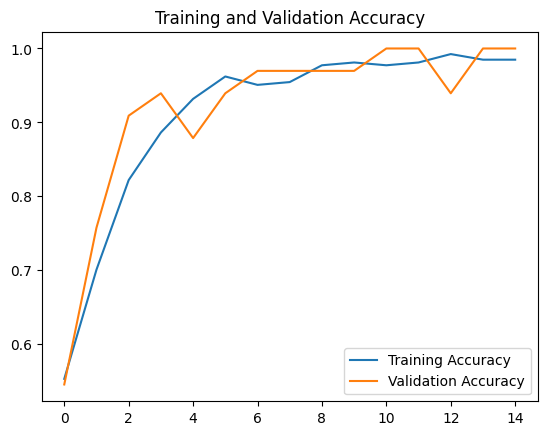

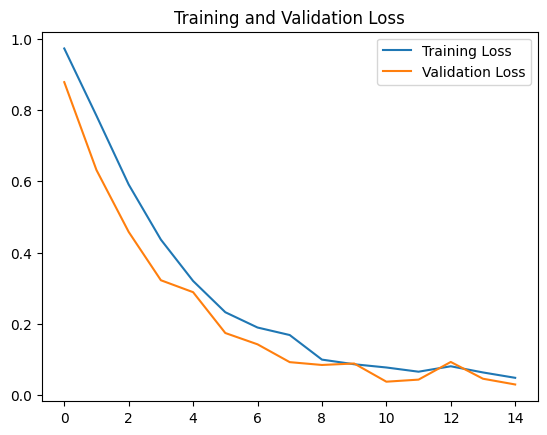

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define accuracy and loss values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy Plot
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

# Training and Validation Loss Plot
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
# Evaluate model on test data
model.evaluate(test_generator, verbose = 2)

2/2 - 1s - loss: 0.1672 - accuracy: 0.9394 - 1s/epoch - 617ms/step


[0.16721108555793762, 0.939393937587738]

**Predict Image**

Saving laterit(1).jpg to laterit(1).jpg
1/1 [==============================] - 56s 56s/step
[0.28691146 0.0119061  0.7011824 ]


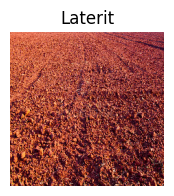

In [ ]:
# Import Libraries
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Predict Image
class_index = {v : k for k, v in train_generator.class_indices.items()}

uploaded = files.upload()

figure = plt.figure(figsize = (2, 2*len(uploaded)))

for i, image_test in enumerate(uploaded):
  img = load_img(image_test, target_size = (size, size))
  x = img_to_array(img)/255
  x = np.expand_dims(x, axis = 0)
  x = np.vstack([x])

  classes = model.predict(x, batch_size = batch_size)
  predicted_class = np.argmax(classes)
  predict = class_index[predicted_class]

  # Show the prediction percentage
  print(classes[0])

  # Show the prediction image
  images = figure.add_subplot(len(uploaded), 1, i+1)
  images.imshow(img)
  images.set_title(predict)
  images.axis(False)

**Export Model**

In [ ]:
# Convert model to TFLite without quantization

import pathlib

export_dir = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/model1'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/model1/model.tflite')
tflite_model_file.write_bytes(tflite_model)

12836836

In [ ]:
# Convert model to TFLite with quantization

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

tflite_quant_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/3/model1/quant_model.tflite')
tflite_quant_model_file.write_bytes(tflite_quant_model)

3392632